In [16]:
%matplotlib inline
import numpy as np
import pylab

In [179]:
fin = 'test.cand'
d = np.loadtxt(fin)
d[:, 1] -= d[0, 1]
dnew = np.array([d[:, 0], d[:, 1], d[:, 1], d[:, 1], d[:, 2], d[:, 3], d[:, 4], d[:, 4], d[:, 4], d[:, 5], d[:, 6], np.ones(d.shape[0])]).T
dorig = dnew.copy()

class MyValues(object):
    def __init__(self):
        self.tdist = 4
        self.ddist = 4
    
values = MyValues()

In [180]:
def errplot(alldarr, **kwargs):
    alldarr = np.array(alldarr)
    xerr = np.array([-alldarr[:, 2] + alldarr[:, 1], alldarr[:, 3] - alldarr[:, 1]])
    yerr = np.array([alldarr[:, 6] - alldarr[:, 7] , alldarr[:, 8] - alldarr[:, 6]])
    pylab.errorbar(alldarr[:, 1], alldarr[:, 6], xerr=xerr, yerr=yerr, ls='none', **kwargs)

In [181]:
def fof(d, values):
    alld = []
    last_numd = d.shape[0]
    print('Initial size', last_numd)
    old_d = d.copy()
    iteration = 1
    while True:
        bestd, drest = fof_iter(d, values)
        alld.append(bestd)

        d = drest
        print('new size', drest.shape[0])
        if drest.shape[0] == 0:
            
            pylab.scatter(old_d[:, 1], old_d[:, 6], marker='x')
            pylab.title('Iteration %d' % iteration)
            pylab.savefig('Iteration%d.png'%iteration)
            iteration += 1

            d = np.array(alld)
            if d.shape[0] == last_numd:
                print('Terminating', d.shape)
                break

            last_numd = d.shape[0]
            old_d = d.copy()
            alld = []
            print('New iteration. Best size', last_numd)

    pylab.show()

    return d
    

In [182]:
def find_friends_mask(myd, d, values):
    mysn, mysamp, mysamp1, mysamp2, myt, mybc, myidt, myidt1, myidt2, mydm, mybeam, mcount = myd
    assert mysamp1 <= mysamp <= mysamp2
    assert myidt1 <= myidt <= myidt2
    tmask1 = mysamp1 - values.tdist <= d[:, 3]
    tmask2 = mysamp2 + values.tdist >= d[:, 2]

    dmask1 = myidt1 - values.ddist <= d[:, 8]
    dmask2 = myidt2 + values.ddist >= d[:, 7]
    
    tmask = tmask1 & tmask2
    dmask = dmask1 & dmask2
    fullmask= tmask & dmask
    return fullmask

In [183]:
def fof_iter(d, values):
    myd = d[0, :]
    fullmask = find_friends_mask(myd, d, values)
    related = d[fullmask, :]

    assert related.shape[0] != 0

    if related.shape[0] == 1: # we're the only thing nearby
        best_d = myd
    else: # update points we ate
        best_idx = np.argmax(related[:, 0])
        best_d = related[best_idx, :]
        
        best_d[2] = np.min(related[:, 2])
        best_d[3] = np.max(related[:, 3])
        
        best_d[7] = np.min(related[:, 7])
        best_d[8] = np.max(related[:, 8])
        best_d[11] += related.shape[0]
        #print 'BEST', best_d
        #print 'related', related.shape, related

        assert best_d[7] <= best_d[6] <= best_d[8] 
        assert best_d[2] <= best_d[1] <= best_d[3]



    return best_d, d[~fullmask, :]

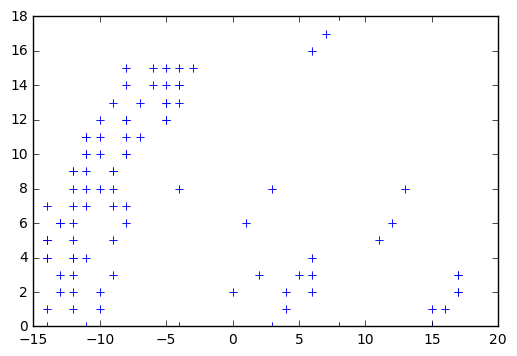

In [184]:
errplot(dnew)

In [185]:
d = dnew

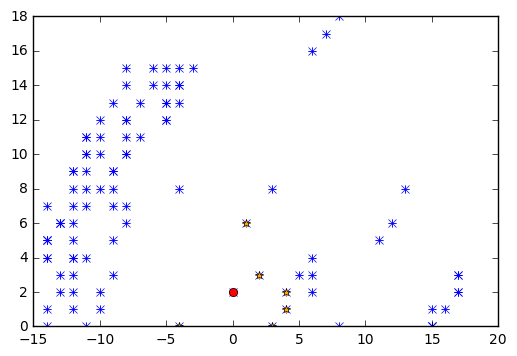

In [205]:
myd = d[0, :]
fullmask = find_friends_mask(myd, d, values)
errplot(d[:, :], c='blue', marker='x')
#errplot(d[tmask, :], c='green', marker='s')
errplot(d[fullmask, :], c='orange', marker='*')
errplot([myd], c='red', marker='o')


In [198]:
drest = d
allbest = []

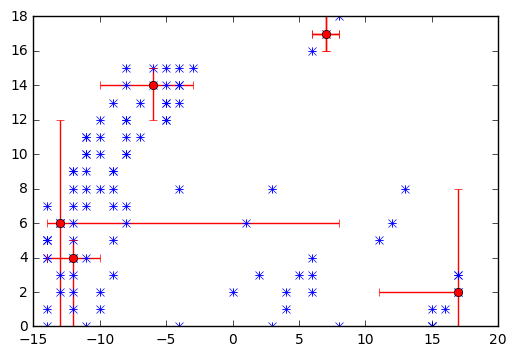

In [219]:
bestd, drest = fof_iter(drest, values)
allbest.append(bestd)
errplot(dorig, marker='x')
errplot([bestd], marker='x', c='red')
errplot(drest, marker='s', c='green', alpha=0.4)
errplot(allbest, marker='o', c='red')

In [214]:
drest = np.array(allbest)
allbest = []

In [220]:
d = np.loadtxt(fin)



In [224]:
print(d.shape)
print(d[:, 0].shape)

(99, 7)
(99,)


In [235]:
np.concatenate((d, d[:, 0:0]), axis=1).shape

(99, 7)